In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np



In [2]:
sns.set(
     font_scale=2,
     style     ='whitegrid',
     rc        ={'figure.figsize' :(20,7)}
)

In [3]:
sales_team  = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/shared/sales_team.csv')
order_leads = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/shared/order_leads.csv')
invoices    = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/shared/invoices.csv')

In [4]:
sales_team.head()

,Sales Rep,Sales Rep Id,Company Name,Company Id
0,William Taylor,ZTZA0ZLYZR85PTUJ,Melancholy Social-Role,D0AUXPP07H6AVSGD
1,William Taylor,ZTZA0ZLYZR85PTUJ,Pee-Wee Pigeon,TJW99R4RWH02INII
2,William Taylor,ZTZA0ZLYZR85PTUJ,Vaginal 36-Year-Old,3S20IO1O1DYXMUNU
3,William Taylor,ZTZA0ZLYZR85PTUJ,Unhurried Musician'S,FDWW0TQRPGMVI2A7
4,William Taylor,ZTZA0ZLYZR85PTUJ,Comprehensive Lists,C30FY83UNLVBA0O3


In [5]:
order_leads['Date'] = pd.to_datetime(order_leads.Date)

In [6]:
order_leads.dtypes

Order Id                object
Company Id              object
Company Name            object
Date            datetime64[ns]
Order Value              int64
Converted                int64
dtype: object

In [7]:
order_leads=order_leads.rename(columns= {'Order Id': 'Order_Id',
                   'Company Id' : 'Company_Id',
                   'Company Name' : 'Company_Name',
                   'Order Value' : 'Order_Value',
                    })

In [8]:
#Гравик CR по дням

In [9]:
order_leads.head()

,Order_Id,Company_Id,Company_Name,Date,Order_Value,Converted
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0


In [10]:
cr_by_day.plot()

NameError: name 'cr_by_day' is not defined

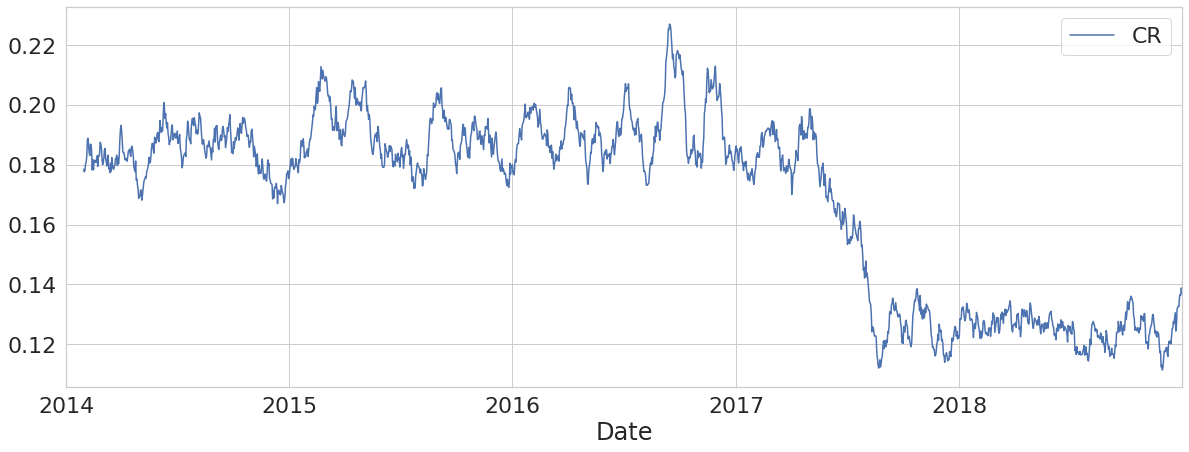

In [11]:
ax = order_leads.groupby(['Date'])\
    .agg({'Converted': 'mean'})\
    .rename(columns={'Converted': 'CR'})\
    .sort_values('Date')\
    .rolling(30).mean().plot()

In [12]:
cr_by_day_rolling = order_leads.groupby(['Date'])\
    .agg({'Converted': 'mean'})\
    .rename(columns={'Converted': 'CR'})\
    .sort_values('Date')\
    .rolling(30).mean()

In [1]:
cr_by_day_rolling.head()

NameError: name 'cr_by_day_rolling' is not defined

[Text(0, 0, '10%'),
 Text(0, 0, '12%'),
 Text(0, 0, '14%'),
 Text(0, 0, '16%'),
 Text(0, 0, '18%'),
 Text(0, 0, '20%'),
 Text(0, 0, '22%'),
 Text(0, 0, '24%')]

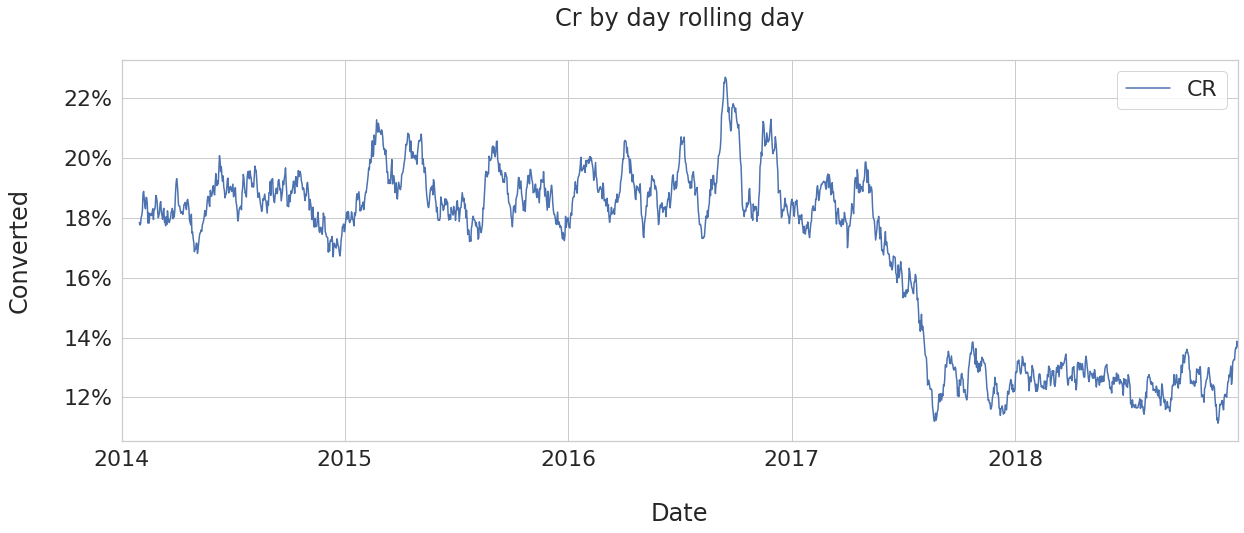

In [14]:
ax = cr_by_day_rolling.plot()
ax.set_title('Cr by day rolling day\n')
ax.set_ylabel('Converted\n')
ax.set_xlabel('\nDate')
ax.set_yticklabels(['{:.0%}'.format(n) for n in ax.get_yticks()])